# This Demo Uses the BRICS QUERY-API tool to: 
- [I) API QUERY: Find All Studies in a BRICS instance (FITBIR) using a Standard Form (GCS- Glasgow Coma Scale)](#Query-I) 
</br>
- [II) API QUERY: Compile and Extract Data Element Values (GCS Scores) Recorded in a Standard Form (GCS) across Multiple Studies Stored in a BRICs Instance (FITBIR) after filtering by the Data Element Value GCS.Main.AgeYrs ](#Query-II)
</br>

- [III) Explore the Extracted Datasets Locally:](#Explore)  
    - [A) View the number of subjects between  0-10 years of age collected per study in FITBIR](#Vis-A) 
    - [B) View the multi-study distribution of other data elements collected in the GCS form- GCS.Main.AgeYrs (Age)](#Vis-B) 
    

### For More Information regarding FITBIR Query-API endpoints please see 
https://fitbir.nih.gov/gateway/query-api/swagger-ui/index.html 


### General Set-up: 

#### Import Dependencies

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import requests
import getpass
import maskpass
from io import StringIO
import json
import pandas as pd
import numpy as np



 #### Enter Query-API Authentication Token (log into FITBIR repository account and click under Account Management) 

In [2]:
#Set Input token: Tokens can be obtained by logging into your FITBIR repository account and clicking on Account Management tab

#token = maskpass.askpass(prompt="Enter your user token")
token = getpass.getpass('Enter your user token:')

Enter your user token:········


In [ ]:
# The token expires after 30 minutes: to renew the token 
#urlRenew = 'https://fitbir.nih.gov/gateway/rasauth/user/extendApi'

#renew = requests.get(urlRenew, headers={'Authorization':'Bearer ' + token})
#token = renew.text

#### Define Parameters

In [3]:
# Define BRICs instance of interest: i.e. fitbir.nih.gov, pdbp.ninds.nih.gov, brics.nei.nih.gov, cdrns.nih.gov
BRICSInstance = 'fitbir.nih.gov'

In [4]:
# Define the form and data element to filter upon: Note the full data element name for a given form is defined by 
# formName.repeatableGroup.dataElementName: Ex GCS.Main.AgeYrs

formName='GCS' 

# Define Data Element to Filter
repeatableGroup="Main"
dataElement="AgeYrs"

#Filter Params
rangeStart="0"
rangeEnd="10"



### I) API QUERY: Find All Studies in a BRICS instance (FITBIR) using a Standard Form (GCS- Glasgow Coma Scale)<a name="Query-I"></a>

For more information regarding the GCS Form See: https://fitbir.nih.gov/dictionary/publicData/dataStructureAction!view.action?dataStructureName=GCS&publicArea=true&style.key=fitbir-style <br />

Interactively Search All FITBIR Forms via the web-interface here: https://fitbir.nih.gov/content/data-dictionary#form-structures

#### Set up the Request Header 

For more specifications regarding this endpoint please see: https://fitbir.nih.gov/gateway/query-api/swagger-ui/index.html#/study/getStudyByFormName <br />

In [5]:
# Define the Header and Query URL 

formstructureheader = {
    'accept': 'application/json',
    'Content-type': 'application/json',
     'Authorization':'Bearer ' + token    
}

formstructureurl =  "https://" +  BRICSInstance + "/gateway/query-api/study/form?formName="

#### Define Desired Search Parameters

#### Perform API Request

In [6]:
#Request GET data
formstructurequery = requests.get(formstructureurl + formName,headers=formstructureheader)

# check status code to make sure ran correctly 
if formstructurequery.status_code == 200: 
    print('The API Request was run successfully')
else: 
    print('There was an Error in your API request: Check Status Code- ' + str(formstructurequery.status_code))
    
# obtain the information in json form from query output
formstructureinformation = formstructurequery.json()
          


print(f'{formstructurequery}: There are {len(formstructureinformation[0]["studies"])} studies with {formstructureinformation[0]["form"]} data.')

The API Request was run successfully
<Response [200]>: There are 8 studies with GCS data.


####  View Output: Table of studies using Form (GCS) as Specified Above 

In [7]:
# Convert from json to panda data frame 
formstructuredata = pd.json_normalize(formstructureinformation,record_path ="studies")

In [8]:
formstructuredata

,abstract,status,id,title,pi,fundingAmount
0,Activity-related concussion is a growing epide...,Public,FITBIR-STUDY0000237,Development and Validation of the Virtual Envi...,Geoffrey Wright,NaN
1,The goal of acute traumatic brain injury (TBI)...,Public,FITBIR-STUDY0000389,Development and validation of spreading depola...,Jed Hartings,4729860.0
2,Importance: There is limited information about...,Public,FITBIR-STUDY0000249,Effects of Erythropoietin on Cerebral Vascular...,"Claudia Robertson, MD",NaN
3,This study is an observational study of mild T...,Public,FITBIR-STUDY0000350,Mission Connect Mild TBI Research Consortium,"Claudia Robertson, MD",NaN
4,We conducted this observational prospective co...,Public,FITBIR-STUDY0000395,PEDiatric vALidation oF vAriableS in TBI (PEDA...,Tellen Bennett,700827.0
5,Effective treatment of traumatic brain injury ...,Public,FITBIR-STUDY0000411,Transforming Research and Clinical Knowledge i...,"David Okonkwo, MD, PhD",4534300.0
6,Effective treatment of traumatic brain injury ...,Public,FITBIR-STUDY0000267,Transforming Research and Clinical Knowledge i...,"Geoffrey Manley, MD, PhD",3435920.0
7,Effective treatment of traumatic brain injury ...,Public,FITBIR-STUDY0000409,Transforming Research and Clinical Knowledge i...,"Geoffrey Manley, MD, PhD",3735920.0


### II) API QUERY: Compile and Extract Data Element Values (GCS Scores) Recorded in a Standard Form (GCS) across Multiple Studies Stored in a BRICs Instance (FITBIR) after filtering by Data Element Value GCS.Main.AgeYrs (0-10).  <a name="Query-II"></a>


#### Set up Request Header: 

For more specifications regarding this endpoint see: https://fitbir.nih.gov/gateway/query-api/swagger-ui/index.html#/data/getInstancedDataCsv

In [9]:
# Define API headers and query URL

queryurl ="https://" +  BRICSInstance + "/gateway/query-api/data/csv"

#Typically Included in Request Header 
#Accept - For specifying the type of content that can be accepted in a response. (json etc) See corresponding swagger documentation for options
#Content-type - For indicating the type of content that’s included in the request body. (json etc) See corresponding swagger documentation for details as to the format of the request body
#Authorization - in the format of 'Bearer ' + token 

headers = {
    'accept': 'application/zip', 
    'Authorization':'Bearer ' + token }


#### Create the Request Body Filter: 

In [10]:
# Age Filter 0-10
fitbirDataElementFilter = {
    "formStudy": [
        {
        "form": formName #"string",
#           "studies": [
#             "string"
#          ]
        }
        ],
       "filter": [
         {
          "form": formName,
          "repeatableGroup": repeatableGroup, #"string"
          "dataElement": dataElement, #"string"
          "rangeStart": rangeStart, #string
          "rangeEnd": rangeEnd, #string 
          "mode": "inclusive",
         }
       ],
 }

#### Run the Query

In [11]:
#Post filter to Query API- 
%time query = requests.post(queryurl,headers=headers,json=fitbirDataElementFilter)

# check status code to make sure ran correctly 
if query.status_code == 200: 
    print('The API Request was run successfully!')
else: 
    print('There was an Error in your API request: Check Status Code- ' + str(query.status_code) + 'for details')
          

CPU times: total: 422 ms
Wall time: 31.7 s
The API Request was run successfully!


In [12]:
print(f'Data received: {query.headers["Content-Disposition"][21:96]}') 

Data received: query_result_GCS_2024-04-10T08-57-196308642413865406651.csv"


#### View Output: Table of Form Data Element Measurement (GCS) Values Compiled Across All BRICs Instance (FITBIR) Studies
<br> 
NOTE: Each Row in the below table represents One Measurement Per Subject, Subjects may have multiple measurements at different time points since baseline (injury) recorded as GCS.Main.DaysSinceBaseline) 

In [13]:
# Retrieve the data from the query and reformat from text to pandas dataframe
dataset = query.text
texttodf = StringIO(dataset)

fitbir_data = pd.read_csv(texttodf, sep=",",low_memory=False)
print(f'Number of ' + formName + ' measurements is ' + str(len(fitbir_data)))

pd.set_option('display.max_columns', None)
fitbir_data

Number of GCS measurements is 1833


,Study ID,Dataset,GCS.Main.GUID,GCS.Main.ASSOCIATED GUID,GCS.Main.SubjectIDNum,GCS.Main.AgeYrs,GCS.Main.VitStatus,GCS.Main.VisitDate,GCS.Main.SiteName,GCS.Main.DaysSinceBaseline,GCS.Main.CaseContrlInd,GCS.Main.GeneralNotesTxt,GCS.Form Administration.ContextType,GCS.Form Administration.ContextTypeOTH,GCS.Form Administration.DataSource,GCS.Form Administration.DataSourceOTH,GCS.Glasgow Coma Scale.GCSConfounderTyp,GCS.Glasgow Coma Scale.GCSEyeRespnsScale,GCS.Glasgow Coma Scale.GCSMotorRespnsScale,GCS.Glasgow Coma Scale.GCSVerbalRspnsScale,GCS.Glasgow Coma Scale.GCSTotalScore,GCS.Glasgow Coma Scale.PupilReactivityLghtLftEyeReslt,GCS.Glasgow Coma Scale.PupilReactivityLghtRtEyeReslt,GCS.Glasgow Coma Scale.PupilLftEyeMeasr,GCS.Glasgow Coma Scale.PupilRtEyeMeasr,GCS.Glasgow Coma Scale.PupilShapeLftEyeTyp,GCS.Glasgow Coma Scale.PupilShapeRtEyeTyp,GCS.Pediatric Glasgow Coma Scale.GCSConfounderTyp,GCS.Pediatric Glasgow Coma Scale.PGCSEyeRespnsScore,GCS.Pediatric Glasgow Coma Scale.PGCSMotorRespnsScore,GCS.Pediatric Glasgow Coma Scale.PGCSVerbalRespnsScore,GCS.Pediatric Glasgow Coma Scale.PGCSTotalScore,GCS.Pediatric Glasgow Coma Scale.PupilReactivityLghtLftEyeReslt,GCS.Pediatric Glasgow Coma Scale.PupilReactivityLghtRtEyeReslt,GCS.Pediatric Glasgow Coma Scale.PupilLftEyeMeasr,GCS.Pediatric Glasgow Coma Scale.PupilRtEyeMeasr,GCS.Pediatric Glasgow Coma Scale.PupilShapeLftEyeTyp,GCS.Pediatric Glasgow Coma Scale.PupilShapeRtEyeTyp
0,409,FITBIR-DATA0012013,TBIFK582RAC,NaN,NaN,0.000,NaN,NaN,2.0,0.27,Case,CAMRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,5,15,Brisk,Brisk,3.0,3.0,Unknown,Unknown
1,409,FITBIR-DATA0012013,TBIPP217RPL,NaN,NaN,0.000,NaN,NaN,2.0,0.27,Case,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,5,15,NaN,NaN,2.0,2.0,NaN,NaN
2,409,FITBIR-DATA0012013,TBIFM679JPU,NaN,NaN,0.000,NaN,NaN,2.0,0.29,Case,CAMRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,5,15,Brisk,Brisk,3.0,3.0,NaN,NaN
3,409,FITBIR-DATA0012013,TBIWT580NNW,NaN,NaN,0.000,NaN,NaN,2.0,0.29,Case,CAMRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,5,15,Brisk,Brisk,3.0,3.0,Round,Round
4,409,FITBIR-DATA0012013,TBILP663EZR,NaN,NaN,1.000,NaN,NaN,2.0,0.30,Case,CAMRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,5,15,Brisk,Brisk,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,395,FITBIR-DATA0008994,TBI_INVZD406NJ8,NaN,798.0,0.750,NaN,NaN,NaN,NaN,NaN,"NA In the PupilReact data element, the value '...","Other, specify",In the Emergency Department,Chart/Medical record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown;Sedation,1,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1829,395,FITBIR-DATA0008994,TBI_INVTX524AVC,NaN,782.0,0.416,NaN,NaN,NaN,NaN,NaN,"NA In the PupilReact data element, the value '...","Other, specify",In the ICU,Chart/Medical record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,1,4,1,6,NaN,NaN,NaN,NaN,NaN,NaN
1830,395,FITBIR-DATA0008994,TBI_INVDW726DJB,NaN,791.0,4.000,NaN,NaN,NaN,NaN,NaN,"NA In the PupilReact data element, the value '...","Other, specify",In the Emergency Department,Chart/Medical record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,3,4,1,8,NaN,NaN,NaN,NaN,NaN,NaN
1831,395,FITBIR-DATA0008994,TBI_INVDW726DJB,NaN,791.0,4.000,NaN,NaN,NaN,NaN,NaN,"NA In the PupilReact data element, the value '...","Other, specify",In the ICU,Chart/Medical record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,4,4,1,9,NaN,NaN,NaN,NaN,NaN,NaN


### Explore the extracted dataset locally: <a name="Explore"></a>

#### A) View the number of GCS measurements taken at 0-10 years of age collected per study in FITBIR <a name="Vis-A"></a>

In [14]:
# Clean up GCSTotalScore (remove any GCA Total NANs)
# need to be BOTH NaN Adult AND Pediatric GCS

fitbir_dataClean = fitbir_data.dropna(subset=['GCS.Glasgow Coma Scale.GCSTotalScore','GCS.Pediatric Glasgow Coma Scale.PGCSTotalScore'],how='all')

In [16]:
# find number of subjects rather than number of individual measurements 
studies = fitbir_dataClean['Study ID'].unique()
numSubjects = []
for s in studies: 
    dfC = fitbir_dataClean[fitbir_dataClean['Study ID']==s]
    n = len(dfC['GCS.Main.GUID'].unique())
    numSubjects.append(n)

numSubjects
total = sum(numSubjects)
df1 = pd.DataFrame(studies,columns = ['studyID'])
df2 = pd.DataFrame(numSubjects,columns = ['Number Of Subjects'])
                    
dfToSort = pd.concat([df1,df2],axis=1)
# sort by number of subjects 
dfSorted = dfToSort.sort_values(by='Number Of Subjects',ascending=False)
print('There are a Total of ' + str(total) + ' subjects over ' +  str(len(studies)) + ' studies')

There are a Total of 334 subjects over 2 studies


[237.0, 389.0, 249.0, 350.0, 395.0, 411.0, 267.0, 409.0]


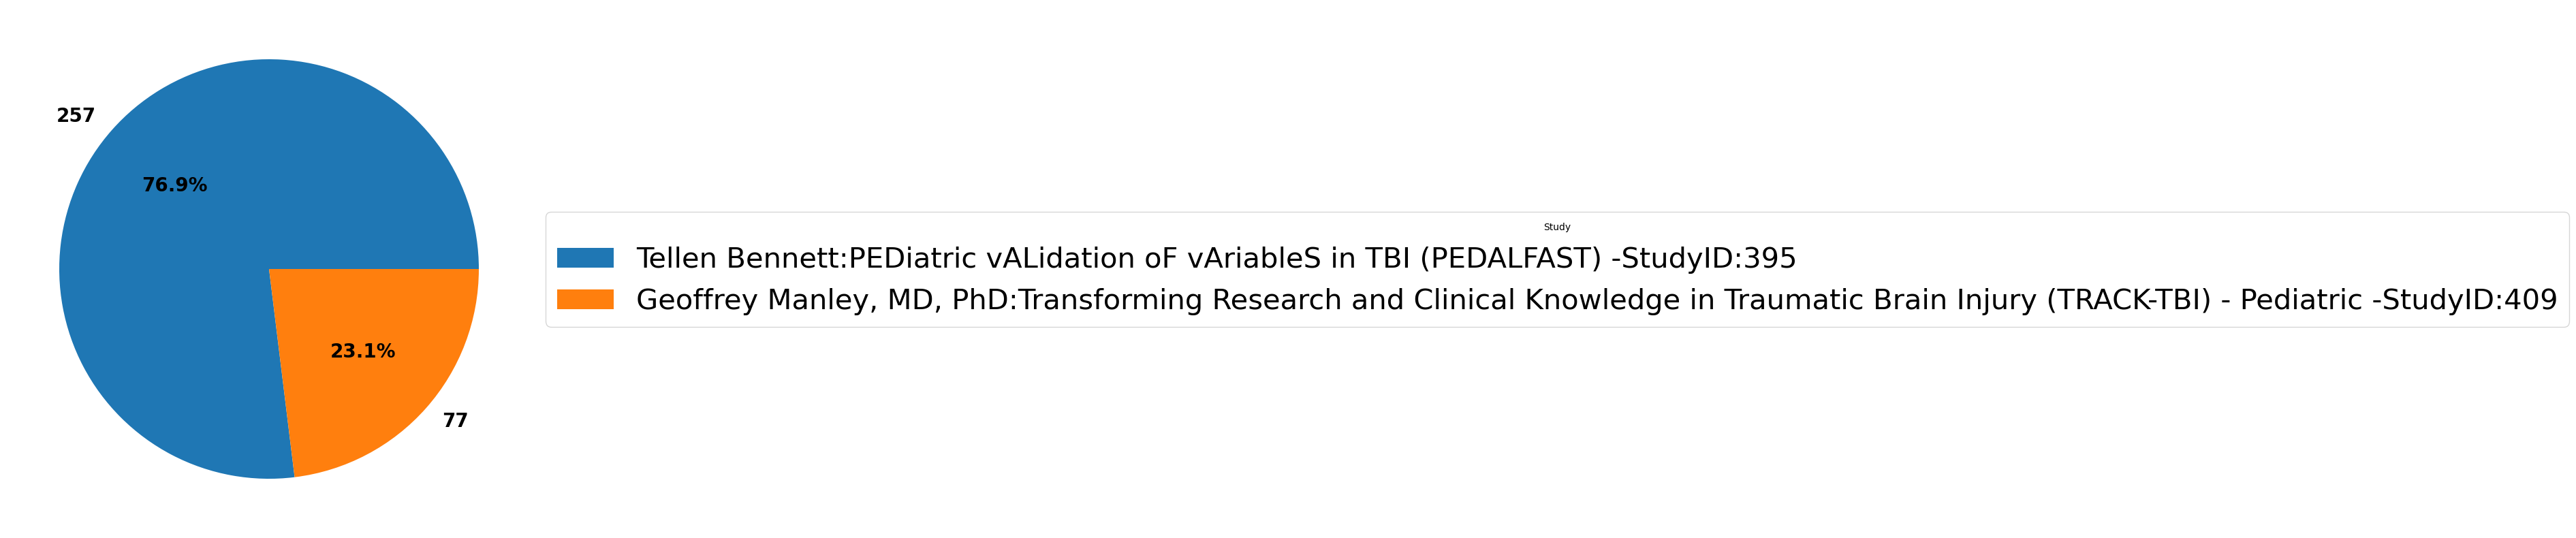

In [17]:
studyList = []
# get the numeric study values ID was previously in the format FITBIR-STUDY0000ID#
for idx, row in formstructuredata.iterrows():
    studyList.append(float(row['id'][-3:]))
print(studyList) 
# add to the the original df 
toAdd = pd.DataFrame(studyList,columns=['StudyID'])

formstructuredataMod = pd.concat([formstructuredata,toAdd],axis=1)

fullStudyName = pd.DataFrame()
for s in dfSorted['studyID']: 
    c = formstructuredataMod.loc[formstructuredataMod['StudyID']==s][['pi','title','id']]
    fullStudyName = pd.concat([fullStudyName,c])
#print(fullStudyName)

# Define a custom function to combine columns
def combine_columns(row):
    return str(row['pi']) + ':' + row['title'] + ' -StudyID:' + str((row['id'][-3:]))

# Apply the custom function to create a new column 'Combined'
fullStudyName['Combined'] = fullStudyName.apply(combine_columns, axis=1)

# There are x measurements across y studies
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(dfSorted['Number Of Subjects'], labels= dfSorted['Number Of Subjects'], autopct='%1.1f%%')# textprops=dict(color="w"))
plt.setp(autotexts, size=20, weight="bold")
plt.setp(texts,size=20, weight="bold")
ax.legend(wedges, fullStudyName['Combined'],
          title="Study",
          loc="center left",
          prop = { "size": 30 },
          bbox_to_anchor=(1, 0, 0.5, 1))

#outputFile = r"\Users\bagonismm\Desktop\WorkshopOutput\NumGCSMeasByStudy.pdf"
#plt.savefig(outputFile, format="pdf", bbox_inches="tight")
plt.show()

#### B)  View the multi-study distribution of other data elements collected in the GCS form- GCS.Main.AgeYrs (Age at Measurement) <a name="Vis-B"></a>

Text(0, 0.5, 'Number of Measurements')

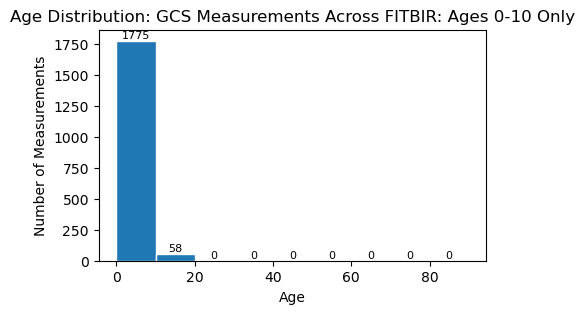

In [18]:
# view the distribution of ages 
plt.figure(figsize=(5,3))
x = range(0, 100, 10)
[counts,bins,bars] = plt.hist(fitbir_data["GCS.Main.AgeYrs"],bins=x,edgecolor='white')
plt.bar_label(bars, fontsize=8, color='black')
#plt.margins(x=0.01, y=0.1)
#ax[0] = plt.bar_label(bars)

plt.title("Age Distribution: GCS Measurements Across FITBIR: Ages 0-10 Only")
plt.xlabel("Age")
plt.ylabel("Number of Measurements")

#[counts,bins,bars] = plt.hist(fitbir_data["GCS.Main.AgeYrs"],bins=x)
